In [4]:
install.packages(c('dplyr', 'vcd'))
library(dplyr)
library(vcd)

also installing the dependency ‘lmtest’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: grid


In [152]:
samplesize <- 300000
sex <- factor(floor(runif(n = samplesize, min = 0, max = 3)), labels = c("male", "female", "other"))
agegroup <- factor(floor(runif(n = samplesize, min = 0, max = 5)), labels = c("10s", "20s", "30s", "40s", "50s"))
d <- data.frame(sex, agegroup)

# クリック率を属性ごとに偏らせてみる

In [153]:
# 偏りのないデータ
ad_click1 <- d %>% mutate(
  click = factor(case_when(
    TRUE ~ rbinom(n(), 1, 0.003)
  )
  , labels = c('no', 'yes')
  )
)
# 偏りのあるデータ(交互作用なし)
ad_click2 <- d %>% mutate(
  click = factor(case_when(
    sex == 'female' ~ rbinom(n(), 1, 0.005)
    , TRUE ~ rbinom(n(), 1, 0.003)
  )
  , labels = c('no', 'yes')
  )
)
# 偏りのあるデータ(交互作用あり)
ad_click3 <- d %>% mutate(
  click = factor(case_when(
    sex == 'female' & agegroup == '20s' ~ rbinom(n(), 1, 0.005)
    , TRUE ~ rbinom(n(), 1, 0.003)
  )
  , labels = c('no', 'yes')
  )
)
# 偏りのあるデータ(単純作用+交互作用)
ad_click4 <- d %>% mutate(
  click = factor(case_when(
    sex == 'female' & agegroup == '20s' ~ rbinom(n(), 1, 0.005)
    , agegroup == '30s' ~ rbinom(n(), 1, 0.003)
    , TRUE ~ rbinom(n(), 1, 0.003)
  )
  , labels = c('no', 'yes')
  )
)

In [154]:
summary(ad_click1)

     sex         agegroup    click       
 male  : 99928   10s:59639   no :299076  
 female: 99922   20s:60213   yes:   924  
 other :100150   30s:60156               
                 40s:60007               
                 50s:59985               

In [155]:
summary(ad_click2)

     sex         agegroup    click       
 male  : 99928   10s:59639   no :298884  
 female: 99922   20s:60213   yes:  1116  
 other :100150   30s:60156               
                 40s:60007               
                 50s:59985               

In [156]:
summary(ad_click3)

     sex         agegroup    click       
 male  : 99928   10s:59639   no :299028  
 female: 99922   20s:60213   yes:   972  
 other :100150   30s:60156               
                 40s:60007               
                 50s:59985               

In [157]:
summary(ad_click4)

     sex         agegroup    click       
 male  : 99928   10s:59639   no :299078  
 female: 99922   20s:60213   yes:   922  
 other :100150   30s:60156               
                 40s:60007               
                 50s:59985               

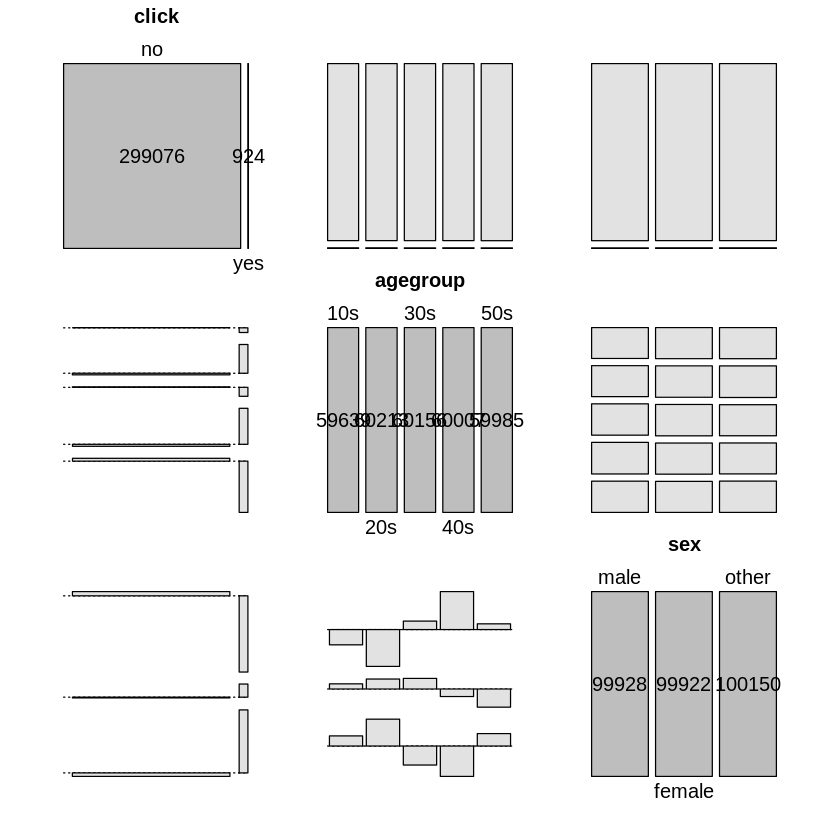

In [158]:
# visualization
pairs(xtabs(~ click + agegroup + sex, data=ad_click1), lower_panel= vcd::pairs_assoc, shade=TRUE)

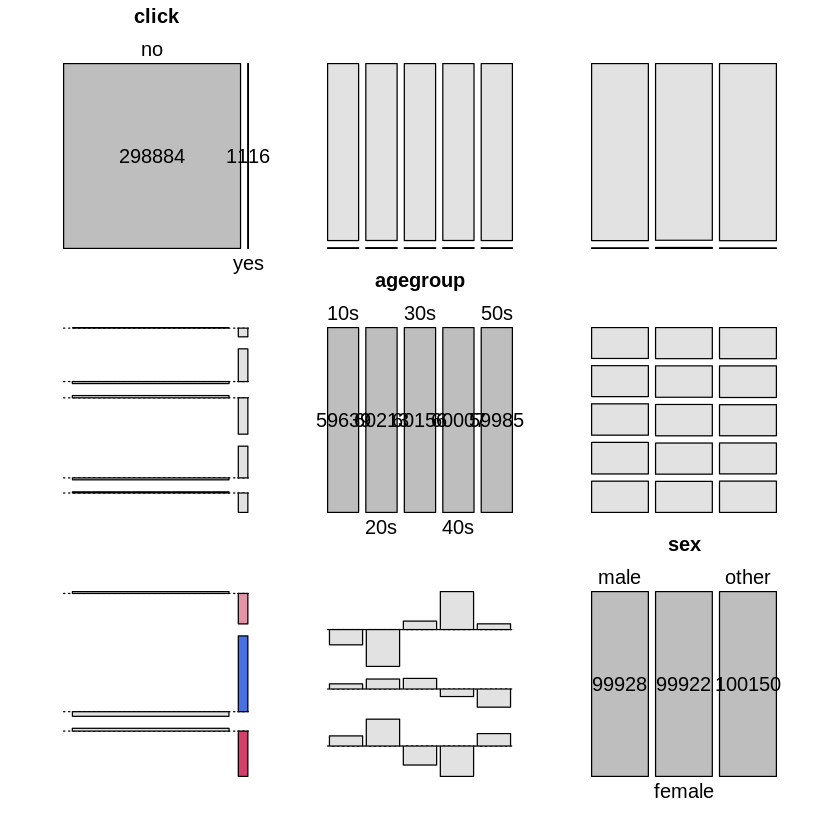

In [159]:
# visualization
pairs(xtabs(~ click + agegroup + sex, data=ad_click2), lower_panel= vcd::pairs_assoc, shade=TRUE)

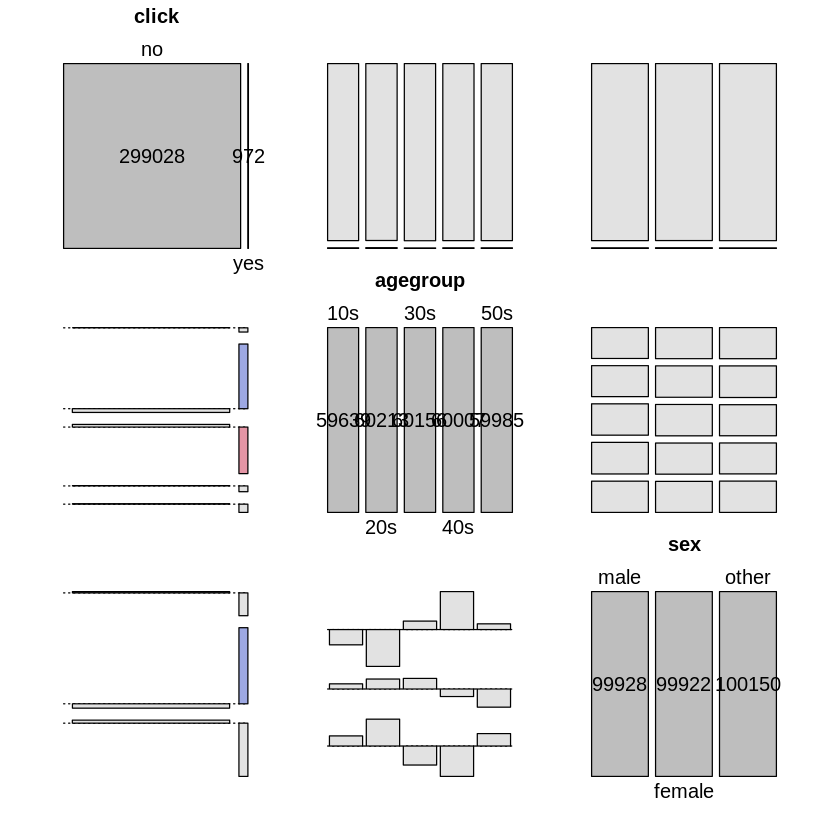

In [160]:
# visualization
pairs(xtabs(~ click + agegroup + sex, data=ad_click3), lower_panel= vcd::pairs_assoc, shade=TRUE)

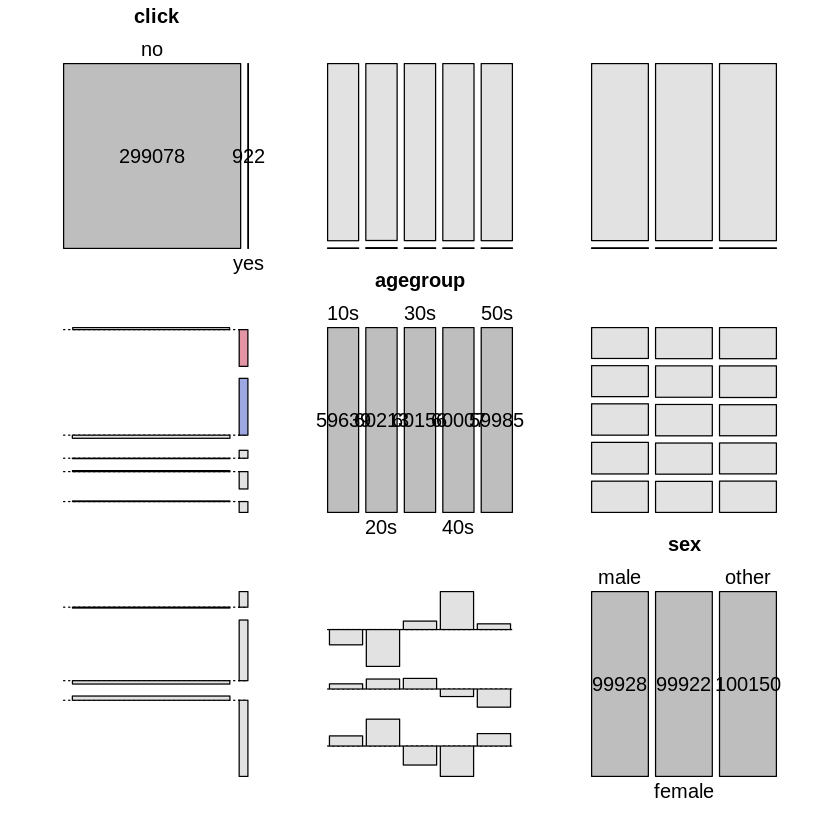

In [161]:
# visualization
pairs(xtabs(~ click + agegroup + sex, data=ad_click4), lower_panel= vcd::pairs_assoc, shade=TRUE)

In [163]:
# modeling
# 偏りのないデータなので、差が有意となってほしくない。
ad_click1.glm <- glm(formula = click ~ sex + agegroup + sex:agegroup, data = ad_click1, family="binomial")
summary(ad_click1.glm)


Call:
glm(formula = click ~ sex + agegroup + sex:agegroup, family = "binomial", 
    data = ad_click1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.0841  -0.0820  -0.0782  -0.0764   3.4837  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -5.9977     0.1430 -41.938   <2e-16 ***
sexfemale               0.2924     0.1888   1.548   0.1215    
sexother                0.3036     0.1882   1.613   0.1067    
agegroup20s             0.2958     0.1888   1.567   0.1172    
agegroup30s             0.1870     0.1928   0.970   0.3320    
agegroup40s             0.1636     0.1935   0.845   0.3980    
agegroup50s             0.1035     0.1967   0.526   0.5988    
sexfemale:agegroup20s  -0.2623     0.2557  -1.026   0.3051    
sexother:agegroup20s   -0.4047     0.2590  -1.563   0.1181    
sexfemale:agegroup30s  -0.2764     0.2623  -1.054   0.2920    
sexother:agegroup30s   -0.2807     0.2619  -1.072   0.2837    
sexfemale:a

In [164]:
# modeling
# femaleのときにクリックしやすいように偏らせているので、sexfemaleについて有意となってほしい
ad_click2.glm <- glm(formula = click ~ sex + agegroup + sex:agegroup, data = ad_click2, family="binomial")
summary(ad_click2.glm)


Call:
glm(formula = click ~ sex + agegroup + sex:agegroup, family = "binomial", 
    data = ad_click2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.1080  -0.1018  -0.0819  -0.0715   3.5094  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -5.79459    0.12929 -44.818  < 2e-16 ***
sexfemale              0.59316    0.16106   3.683 0.000231 ***
sexother              -0.17312    0.19071  -0.908 0.364003    
agegroup20s            0.01369    0.18210   0.075 0.940061    
agegroup30s           -0.21913    0.19279  -1.137 0.255694    
agegroup40s            0.16024    0.17508   0.915 0.360062    
agegroup50s            0.09835    0.17802   0.552 0.580644    
sexfemale:agegroup20s -0.07201    0.22814  -0.316 0.752292    
sexother:agegroup20s   0.23013    0.26079   0.882 0.377545    
sexfemale:agegroup30s  0.28000    0.23450   1.194 0.232466    
sexother:agegroup30s   0.19968    0.27724   0.720 0.471390    
sexfemale:a

In [139]:
# modeling
# femaleかつ20sのときにクリックしやすいように偏らせているので、sexfemale:agegroup20sについて有意となってほしい
ad_click3.glm <- glm(formula = click ~ sex + agegroup + sex:agegroup, data = ad_click3, family="binomial")
summary(ad_click3.glm)


Call:
glm(formula = click ~ sex + agegroup + sex:agegroup, family = "binomial", 
    data = ad_click3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.0937  -0.0893  -0.0811  -0.0698   3.5352  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -5.97575    0.24281 -24.611   <2e-16 ***
sexfemale              0.30782    0.32029   0.961    0.337    
sexother              -0.10143    0.35460  -0.286    0.775    
agegroup20s           -0.13527    0.35458  -0.381    0.703    
agegroup30s           -0.27125    0.36869  -0.736    0.462    
agegroup40s            0.10675    0.33426   0.319    0.749    
agegroup50s            0.45875    0.31007   1.480    0.139    
sexfemale:agegroup20s  0.37620    0.45037   0.835    0.404    
sexother:agegroup20s   0.19584    0.50512   0.388    0.698    
sexfemale:agegroup30s  0.40245    0.46709   0.862    0.389    
sexother:agegroup30s   0.88490    0.48845   1.812    0.070 .  
sexfemale:a

In [165]:
# modeling
# femaleかつ20sのときにクリックしやすいように偏らせている
# あと30sのときにクリックしやすいように偏らせている
ad_click4.glm <- glm(formula = click ~ sex + agegroup + sex:agegroup, data = ad_click4, family="binomial")
summary(ad_click4.glm)


Call:
glm(formula = click ~ sex + agegroup + sex:agegroup, family = "binomial", 
    data = ad_click4)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.1008  -0.0808  -0.0768  -0.0738   3.4980  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -5.71429    0.12424 -45.995  < 2e-16 ***
sexfemale             -0.35303    0.19291  -1.830  0.06725 .  
sexother              -0.40140    0.19544  -2.054  0.04000 *  
agegroup20s            0.05703    0.17314   0.329  0.74185    
agegroup30s           -0.01606    0.17569  -0.091  0.92718    
agegroup40s           -0.19023    0.18347  -1.037  0.29982    
agegroup50s           -0.10951    0.18009  -0.608  0.54314    
sexfemale:agegroup20s  0.73102    0.24821   2.945  0.00323 ** 
sexother:agegroup20s   0.20517    0.26463   0.775  0.43816    
sexfemale:agegroup30s  0.28871    0.26285   1.098  0.27203    
sexother:agegroup30s   0.40771    0.26280   1.551  0.12081    
sexfemale:a

In [167]:
ad_click1 %>% group_by(sex, agegroup)　%>% summarise(count=n())

sex,agegroup,count
male,10s,19771
male,20s,19828
male,30s,20090
male,40s,20223
male,50s,20016
female,10s,19896
female,20s,20117
female,30s,20102
female,40s,19940
female,50s,19867
